In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
nba <- read_csv("https://raw.githubusercontent.com/jakobsereda/dsci-100-project/main/stats.csv")
nba

Rows: 500 Columns: 58
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (21): FIRST_NAME, LAST_NAME, DISPLAY_FIRST_LAST, DISPLAY_LAST_COMMA_FIR...
dbl  (31): PERSON_ID, HEIGHT, WEIGHT, SEASON_EXP, TEAM_ID, FROM_YEAR, TO_YEA...
lgl   (5): GAMES_PLAYED_CURRENT_SEASON_FLAG, DLEAGUE_FLAG, NBA_FLAG, GAMES_P...
dttm  (1): BIRTHDATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,⋯,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24,Duke,USA,⋯,0.571,37,77,114,13,15,12,45,104,256
76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07,Iowa State,USA,⋯,0.739,19,31,50,10,3,3,11,29,63
76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16,UCLA,USA,⋯,0.739,103,231,334,74,38,85,95,196,748
51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09,Louisiana State,USA,⋯,0.759,5,20,25,76,9,1,26,50,266
1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03,San Jose State,France,⋯,0.500,14,26,40,21,6,3,7,26,57
949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11,California,USA,⋯,1.000,6,4,10,4,1,0,1,9,10
76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06,Indiana,USA,⋯,0.591,20,28,48,19,7,3,8,34,63
76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27,Western Kentucky,USA,⋯,NA,NA,NA,1,1,NA,NA,NA,1,0
76007,John,Abramovic,John Abramovic,"Abramovic, John",J. Abramovic,john-abramovic,1919-02-09,Salem,USA,⋯,0.571,NA,NA,NA,2,NA,NA,NA,10,6


In [140]:
nba_data <- nba |>
    select(POSITION, PTS, HEIGHT, WEIGHT, AST, STL, BLK, FT_PCT, FG_PCT, FG3_PCT, REB) |>
    na.omit() |>
    filter(POSITION == "Center" | POSITION == "Forward" | POSITION == "Guard")
    #mutate(POSITION = ifelse(POSITION == "Center-Forward", "Forward-Center", POSITION)) |>
    #mutate(POSITION = ifelse(POSITION == "Guard-Forward", "Forward-Guard", POSITION)) 
nba_data

POSITION,PTS,HEIGHT,WEIGHT,AST,STL,BLK,FT_PCT,FG_PCT,FG3_PCT,REB
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Forward,256,82,240,13,15,12,0.571,0.511,0.000,114
Center,748,86,225,74,38,85,0.739,0.475,0.000,334
Guard,266,73,162,76,9,1,0.759,0.488,0.286,25
Forward,10,81,245,4,1,0,1.000,0.214,0.000,10
Forward,63,79,220,19,7,3,0.591,0.424,0.000,48
Guard,165,78,200,20,17,6,0.923,0.357,0.323,48
Forward,453,80,243,74,36,47,0.621,0.504,0.259,359
Guard,72,77,185,12,5,4,0.500,0.395,0.350,24
Center,64,83,220,5,3,6,0.688,0.531,0.500,67


In [141]:
nba_split <- initial_split(nba_data, prop = 0.75, strata = POSITION)
nba_train <- training(nba_split)
nba_test <- testing(nba_split)

In [161]:
nba_recipe <- recipe(POSITION ~ HEIGHT + WEIGHT, data = nba_train) |> 
    step_scale(all_predictors()) |>
    step_center(all_predictors())
nba_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [162]:
nba_vfold <- vfold_cv(nba_train, v = 5, strata = POSITION)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")   

knn_results <- workflow() |>
    add_recipe(nba_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = nba_vfold, grid = 10) |>
    collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7795401,5,0.015602780,Preprocessor1_Model01
1,roc_auc,hand_till,0.8097152,5,0.007067792,Preprocessor1_Model01
3,accuracy,multiclass,0.8544788,5,0.011759043,Preprocessor1_Model02
3,roc_auc,hand_till,0.9039688,5,0.016871336,Preprocessor1_Model02
4,accuracy,multiclass,0.8589233,5,0.011650302,Preprocessor1_Model03
4,roc_auc,hand_till,0.9016508,5,0.016101257,Preprocessor1_Model03
6,accuracy,multiclass,0.8365871,5,0.012443559,Preprocessor1_Model04
6,roc_auc,hand_till,0.9276050,5,0.012730297,Preprocessor1_Model04
7,accuracy,multiclass,0.8371674,5,0.014700546,Preprocessor1_Model05


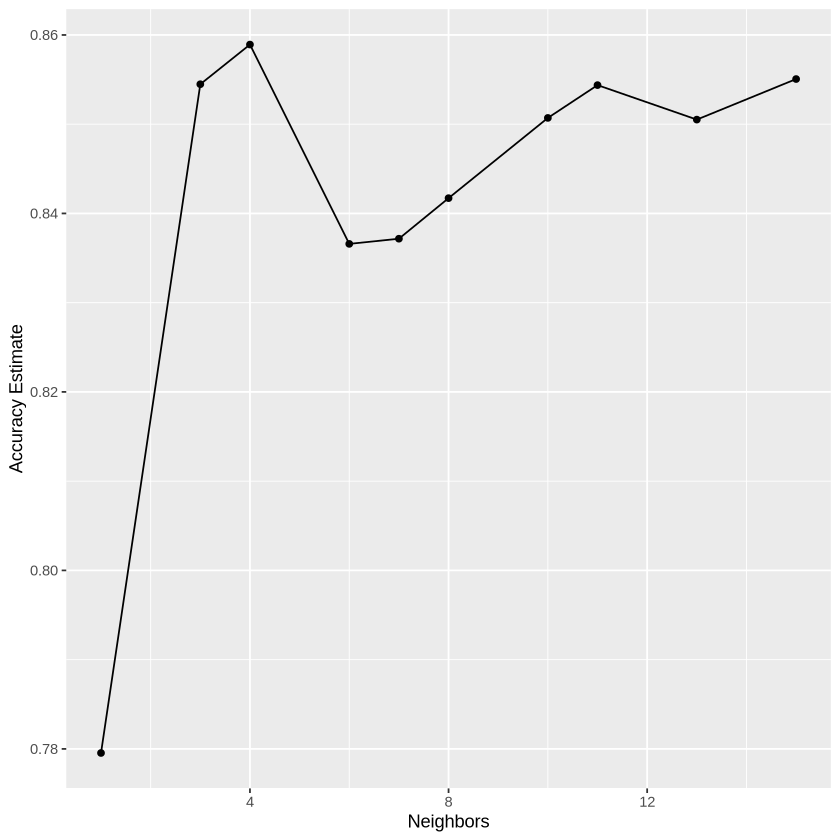

In [163]:
accuracies <- knn_results |>
    filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") #+
    #scale_x_continuous(breaks = seq(0, 20, by = 1)) #+  # adjusting the x-axis
    #scale_y_continuous(limits = c(0.4, 0.7)) # adjusting the y-axis

accuracy_versus_k

In [164]:
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

nba_fit <- workflow() |>
    add_recipe(nba_recipe) |>
    add_model(knn_spec_best) |>
    fit(data = nba_train)
nba_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1674009
Best kernel: rectangular
Best k: 4

In [165]:
nba_test_predictions <- predict(nba_fit, nba_test) |>
    bind_cols(nba_test) |>
    mutate(POSITION = as_factor(POSITION)) |>
    mutate(.pred_class = factor(.pred_class, levels = levels(POSITION)))
nba_test_predictions 

.pred_class,POSITION,PTS,HEIGHT,WEIGHT,AST,STL,BLK,FT_PCT,FG_PCT,FG3_PCT,REB
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Forward,Forward,256,82,240,13,15,12,0.571,0.511,0.000,114
Guard,Guard,165,78,200,20,17,6,0.923,0.357,0.323,48
Forward,Forward,453,80,243,74,36,47,0.621,0.504,0.259,359
Forward,Forward,17,79,240,8,1,4,0.700,0.222,0.133,25
Guard,Guard,179,77,210,30,4,9,0.846,0.401,0.386,66
Guard,Guard,334,77,215,55,30,33,0.750,0.416,0.320,150
Forward,Forward,413,78,232,104,21,8,0.694,0.468,0.398,116
Guard,Guard,10,74,190,1,0,0,0.000,0.286,0.222,2
Guard,Guard,5,71,185,1,0,0,0.000,0.500,0.500,1


In [166]:
nba_mat <- nba_test_predictions |>
    conf_mat(truth = POSITION, estimate = .pred_class)
nba_metrics <- nba_test_predictions |>
    metrics(truth = POSITION, estimate = .pred_class) |>
    filter(.metric == "accuracy")

nba_metrics
nba_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8441558


          Truth
Prediction Forward Guard Center
   Forward      25     2      5
   Guard         4    32      0
   Center        1     0      8